Model Accuracy: 88.51%


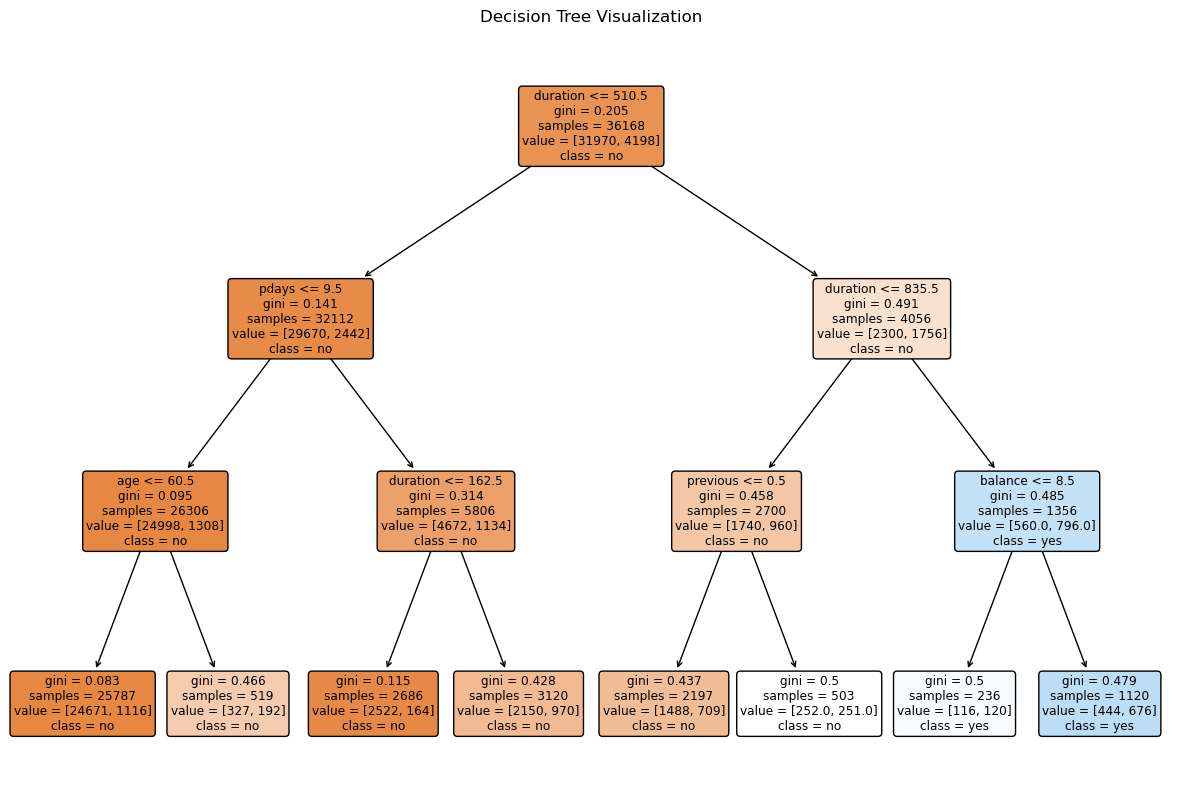

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

file_path = r"D:\Intership projects\bank+marketing (1)\bank\bank-full.csv"
data = pd.read_csv(file_path, delimiter=';')

selected_features = ['age', 'job', 'marital', 'education', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

X = data[selected_features]  # Features
y = data['y']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=3, random_state=42)  # Set max depth for simplicity
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(15,10))  # Adjust the figure size
plot_tree(clf, feature_names=selected_features, class_names=label_encoders['y'].classes_, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

